In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
% matplotlib inline
rc('text', usetex=True)
rc('font', family='serif')

ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

halos_data = np.load('halos_sfrcut_1.5.npy')

logmass = halos_data[:,1]
Cent = halos_data[:,3]
Sats = halos_data[:,4]

#logm_min = 10.5
#logm_max = 15
#NBIN = 30
#halomass_labels = ((logmass - logm_min)/(logm_max - logm_min) * NBIN).astype(int)
#bin_width = (logm_max - logm_min)/NBIN
#bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width *.5

logm_min = 10.5
logm_max = 15
NBIN = 30
halomass_labels = ((logmass - logm_min)/(logm_max - logm_min) * NBIN).astype(int)
bin_width = (logm_max - logm_min)/NBIN
bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width *.5

ICS_plt = np.zeros(NBIN)
ACS_plt = np.zeros(NBIN)    
for i in range(NBIN):
    
    idx = np.where(halomass_labels == i)[0]
    Cent_ar = Cent[idx]
    Sats_ar = Sats[idx]
    
    Mean_Cent = np.mean(Cent_ar)
    Mean_Sats = np.mean(Sats_ar)
    ICS_plt[i] = Mean_Cent * Mean_Sats
    
    CS = Cent_ar * Sats_ar
    ACS_plt[i] = np.mean(CS)
    
np.savetxt("test_assumption_05", np.array([bins, ICS_plt, ACS_plt]).T)    

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
% matplotlib inline
rc('text', usetex=True)
rc('font', family='serif')

ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

halos_data = np.load('halos_masscut_1.5.npy')
logmass = halos_data[:,1]
All = halos_data[:,2] ################ TENGO QUE BORRAR LO QUE NO CUMPLE CON EL CRITERIO 
Cent = halos_data[:,3]
Sats = halos_data[:,4]

#mask = (All != 0)
#logmass = logmass[mask]
#Cent = Cent[mask]
#Sats = Sats[mask]

Model: G13


In [26]:
logm_min = 10.5
logm_max = 15.5
NBIN = 30
labels = (((logmass - logm_min)/(logm_max - logm_min)) * NBIN).astype('int')
bin_width = (logm_max - logm_min)/NBIN
bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width *.5

In [27]:
%%time
Nsat = np.zeros(NBIN)
Ncen = np.zeros(NBIN)
N_cs = np.zeros(NBIN)
Nhalos = np.zeros(NBIN)

mask = (labels >= 0) & (labels < NBIN)
Cent = Cent[mask]
Sats = Sats[mask]
labels = labels[mask]

for j,i in enumerate(labels):
    
    Ncen[i] += Cent[j]
    Nsat[i] += Sats[j]
    N_cs[i] += (Cent[j] * Sats[j])
    Nhalos[i] += 1
    
    
    
    

CPU times: user 29.2 s, sys: 240 ms, total: 29.5 s
Wall time: 29.3 s


In [14]:
Nhalos

array([  4.90362400e+06,   1.55801100e+06,   1.13053900e+06,
         8.10871000e+05,   5.81958000e+05,   4.07121000e+05,
         2.93056000e+05,   2.08953000e+05,   1.48182000e+05,
         1.05262000e+05,   7.38820000e+04,   5.26120000e+04,
         3.66960000e+04,   2.54800000e+04,   1.79430000e+04,
         1.23380000e+04,   8.37700000e+03,   5.47700000e+03,
         3.55300000e+03,   2.27600000e+03,   1.40500000e+03,
         8.46000000e+02,   4.95000000e+02,   2.62000000e+02,
         1.05000000e+02,   5.70000000e+01,   1.60000000e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [6]:
Nsat

array([  0.00000000e+00,   3.00000000e+00,   4.00000000e+00,
         7.00000000e+00,   1.10000000e+01,   2.00000000e+01,
         1.02000000e+02,   6.27000000e+02,   1.81200000e+03,
         3.80800000e+03,   6.96000000e+03,   1.02310000e+04,
         1.33190000e+04,   1.62060000e+04,   1.81560000e+04,
         2.03780000e+04,   2.12660000e+04,   2.27260000e+04,
         2.33870000e+04,   2.26400000e+04,   2.24410000e+04,
         2.09880000e+04,   1.88580000e+04,   1.81040000e+04,
         1.59290000e+04,   1.16870000e+04,   1.02530000e+04,
         5.59900000e+03,   4.94600000e+03,   1.63600000e+03])

In [28]:
Nhalos += 1e-10
Nsat += 1e-10
Ncen += 1e-10

In [29]:
Mean_Cent = Ncen/Nhalos
Mean_Sats = Nsat/Nhalos
DCS = N_cs / Nhalos

In [32]:
Mean_Cent

array([  8.36116309e-06,   3.97943275e-05,   1.20296602e-04,
         4.71098362e-04,   1.57915176e-03,   8.17693020e-03,
         1.85411662e-01,   4.86228961e-01,   6.31696157e-01,
         7.39906139e-01,   8.34181533e-01,   8.97190755e-01,
         9.38576412e-01,   9.64835165e-01,   9.82110015e-01,
         9.88977144e-01,   9.93911902e-01,   9.94522549e-01,
         9.96059668e-01,   9.95166960e-01,   9.97864769e-01,
         9.97635934e-01,   1.00000000e+00,   9.96183206e-01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [30]:
Nsat

array([  1.00000000e-10,   5.00000000e+00,   4.00000000e+00,
         1.00000000e+01,   1.30000000e+01,   5.90000000e+01,
         4.66000000e+02,   1.76200000e+03,   4.07500000e+03,
         7.94300000e+03,   1.19800000e+04,   1.58020000e+04,
         1.90040000e+04,   2.11830000e+04,   2.35950000e+04,
         2.47430000e+04,   2.59110000e+04,   2.51080000e+04,
         2.46610000e+04,   2.29240000e+04,   2.11580000e+04,
         1.88370000e+04,   1.54760000e+04,   1.24100000e+04,
         7.23900000e+03,   5.69600000e+03,   2.04000000e+03,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10])

In [31]:
Mean_Sats

array([  2.03930807e-17,   3.20921996e-06,   3.53813535e-06,
         1.23324179e-05,   2.23383818e-05,   1.44920061e-04,
         1.59013977e-03,   8.43251832e-03,   2.74999663e-02,
         7.54593301e-02,   1.62150456e-01,   3.00349730e-01,
         5.17876608e-01,   8.31357928e-01,   1.31499749e+00,
         2.00543038e+00,   3.09311209e+00,   4.58426146e+00,
         6.94089502e+00,   1.00720562e+01,   1.50590747e+01,
         2.22659574e+01,   3.12646465e+01,   4.73664122e+01,
         6.89428571e+01,   9.99298246e+01,   1.27500000e+02,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [33]:
ICS = Mean_Cent * Mean_Sats

In [ ]:
np.log10(ICS)

(0.01, 1000.0)

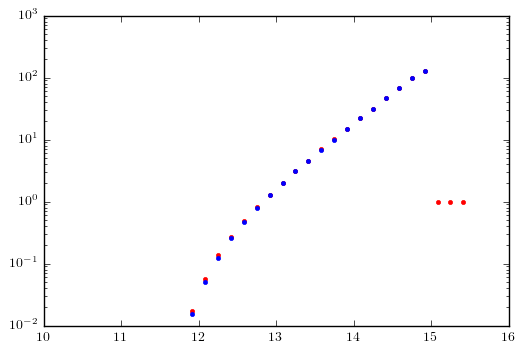

In [34]:
plt.plot(bins, ICS, 'r.')
plt.plot(bins, DCS, 'b.')
plt.yscale('log')
plt.ylim(1e-2, 1e3)

In [ ]:
plt.plot(bins, np.log10(ICS), 'r.')